# Simple Linear Regression

This article is about **Linear Regression**, a very simple yet powerful approach for supervised learning.

You may think it as a rather dull topic given the evolution of *Machine Learning algorithms*, still it is a useful and by far widely used supervised machine learning algorithm. Almost all machine learning problems start with simple learning algorithm (barring few where it is clear that relationship between response and predictor is non-linear - more on that later).

Let's explore some key ideas of **Simple Linear Regression**. There are many libraries which will build this model for you. However, with this article I intend to show what is happening under the hood. This model is so simple that you can even do this in excel or google sheets without writing a single line of code.

Let's start with some data. Below is a few lines of code exploring advertising data.

The **Advertising dataset** consists of the *sales* of some xyz product in 200 markets, hence there are **200 observations(data points)**. Along with sales, advertising budget for three different media is given: *TV, radio*, and *newspaper*.

We want to understand the relationship between the advertising budget and sales to see the effect on the sales due to an increase or decrease in the budget.

In this scenario, the advertising budgets are the *input variables*, and the sales is the *output variable*.

Let's run a few lines of code to plot the data for better understanding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
from matplotlib import pyplot as plt
from IPython.display import display, Math

I already have the data file downloaded in my local filesystem. You can download the same data from my github repository [here](https://github.com/kunalvshah/linear_regression/blob/main/Advertising.csv).

In [2]:
filename = "../datasets/Advertising.csv"
data = pd.read_csv(filename)
data.shape

(200, 5)

We have 200 rows and 5 columns. 5 columns are index, TV, radio, newspaper and sales. 200 rows because we have 200 datapoints


In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Plotting the data

In almost all data science and machine learning projects, before doing anything you will plot the data. A picture is worth a thousand words.

Text(698.9485294117648, 0.5, 'Sales')

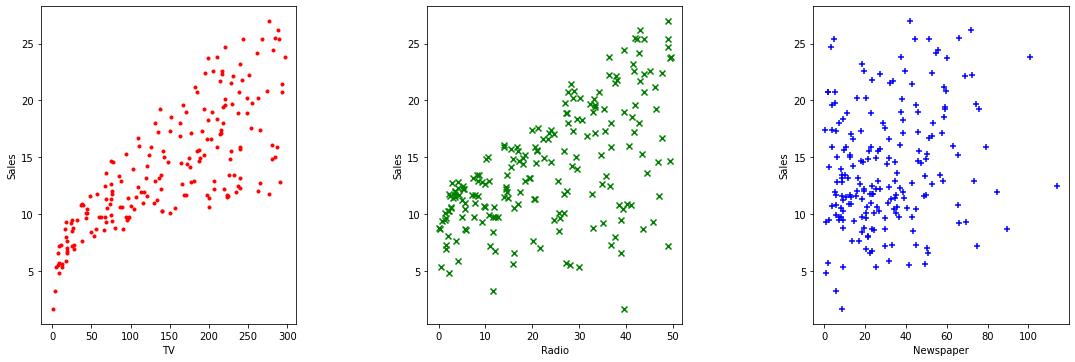

In [4]:
fig, subplt = plt.subplots(1, 3, figsize=(15,5))

fig.tight_layout(w_pad=10, h_pad=10,)

subplt[0].scatter(data.TV, data.sales, color='red', marker=".")
subplt[0].set_xlabel("TV")
subplt[0].set_ylabel("Sales")

subplt[1].scatter(data.radio, data.sales, color='green', marker="x")
subplt[1].set_xlabel("Radio")
subplt[1].set_ylabel("Sales")

subplt[2].scatter(data.newspaper, data.sales, color='blue', marker="+")
subplt[2].set_xlabel("Newspaper")
subplt[2].set_ylabel("Sales")

Let's see if we can answer some questions based on this data
 
The first question I would ask is, **Is there any relationship between advertising budgets and sales?**
 
If you look at the plots closely, you can certainly say there is a relationship between advertising budget and sales. In some cases it is quite clear. For example, the plot on the left, there is a clear positive relationship between TV advertising budget and sales. As the TV advertising budget is increased, we can see an increase in the sales. The relationships in cases of Radio and Newspaper and sales is not quite clear but you can ascertain that there is a similar relationship.
 
However, all we have at this point is an educated guess that there is some relationship between the input variables and the response. How can we test this guess?
 
Let's start answering the question by simple linear regression. Let's do it step by step.



## Estimate the *Coefficents*

Let's start answering the question by simple linear regression. Let's do it step by step.
 
Simple Linear Regression assumes that there is a *linear relationship* between the input and output variable. In our case, it assumes that the relationship between advertising budget for TV and sales is linear, and similarly, between Radio and Sales and Newspaper and sales.
 
Hence this relationship can be described mathematically as the *equation of a line*. In mathematics, the equation of the line is


$$ y = mx + b $$

Where $ m $ is the **slope** of the line and 
$ b $ is the **intercept**.

In linear regression for supervised learning, the equestion is the same with somewhat different nomenclature.

$$ y  \approx \beta_0 + \beta_1X $$

 
You should read $ \beta_0 $ as intercept $ b $ and $ \beta_1$ as the slope $m$. In this learning algorithm, we will call $ \beta_0 $ and $ \beta_1 $ as the **coefficients** and the equation as the **model**. 


For our advertising budget problem, we will write our models as follows. It is **important** to note that the values of $\beta_0$ and $\beta_1$ will be different in all three models. $\beta_1$ and $\beta_0$ are different coefficients for all three models.


$$ sales  \approx \beta_0 + \beta_1 \times TV $$

$$ sales  \approx \beta_0 + \beta_1 \times Radio $$

$$ sales  \approx \beta_0 + \beta_1 \times Newspaper $$


You may have observed, I used the $\approx$ sign in the model. Why so? 

Well, as I mentioned earlier, Simple Linear Regression *assumes* that there is a linear relationship between the input and output variable but it still does not know what this relationship is. The true values of coefficients are unknown. We need our model to *estimate* the coefficients. 
 
How will our model estimate the coefficients? Remember this is a supervised learning algorithm. Hence, we have the data we can use to *train our model*. We will use our $n=200$ observed data points as training data and ask the model to estimate our coefficients. Once our values of coefficients are known, we can predict the future sales on the basis of a value of TV Advertising budget and so on.

In order to estimate the coefficients, we ask our model to regress a line on our data points that is best *fit* to our data. The slope and intercept of this line will be our coefficients. In other words, we want to find an intercept and slope such that the resulting line is as close as possible to the $n = 200$ data points.
 
There are a number of ways to measure *closeness* and most common approach is minimizing the [**least squares**](https://en.wikipedia.org/wiki/Least_squares). Let's see how it is done.
 
We will represent our observed data as pairs $ (x_1,y_1), (x_2, y_2),...,(x_n,y_n) $. 

Here $x_i$ is the TV advertising budget for $i^{th} $ data point and $y_i$ is the corresponding sales for that data point.

Let $\hat y_i = \hat \beta_0 + \hat \beta_1 \times x_i $ be the *prediction* for $y$ based on the $i^{th}$ value of $x$. 

**It is important to note the difference.** 
$y_i$ is the actual or the observed value of the response. $\hat y_i$ is the predicted or estimated value of the response.

Since we already know the actual value of $y_i$, we can use that to understand the difference between the actual value of response and the value predicted/estimated by our model. This difference is called the *residual*.
 
Let's define the *residual* $$e_i = y_i - \hat y_i $$
 
here $e_i$ is the $i^{th}$ residual - the difference between the $i^{th}$ observed response value and the predicted or estimated value.
 
and for the entire dataset, we calculate the ***Residual Sum of Squares (RSS)*** as 

$$ RSS = e_1^2 + e_2^2 + ... + e_n^2 $$

or equivalently as

$$ RSS = (y_1 - \hat y_1)^2 + (y_2 - \hat y_2)^2 + ... + (y_n - \hat y_n)^2 $$

or equivalently as

$$ RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + ... + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2 $$


What we need to do next is ask our model to ***minimize the RSS***. By minimizing RSS, we are asking our model to reach a state where the difference between observed value of the response and the predicted value of the response is minimum for the entire dataset. The values of the coffiences at that state of the model is what we are interested in.

Using some calculus, we can show that the minmizers for RSS are

$$ \hat \beta_1 = \frac{ \sum_{i=0}^{n}(x_i - \bar x) (y_i - \bar y)}{\sum_{i=0}^{n}(x_i - \bar x)^2}$$

and

$$ \hat \beta_0 = \bar y - \hat \beta_1 \bar x $$


Here, $\bar x$ and $\bar y$ are sample means.

To keep this article relevant to people who don't know calculus, I omitted the detailed explanation of these minimizers. The calculus uses the principle of maxima and minima which involves taking the partial derivatives of RSS with respect to both $\hat\beta_0$ and $\hat\beta_1$ and setting them equal to 0. You can find step by step instructions to solve the equation on the internet.



Let's see that in the code. We are going to use vectorization in numpy. Vectorization is used to speed up the Python code without using a loop. You can find more information on that from the internet.

In [5]:
x_mean = np.mean(data.TV)
y_mean = np.mean(data.sales)
n = data.shape[0]

beta_1 = np.sum((data.TV - x_mean) * (data.sales - y_mean)) / np.sum((data.TV-x_mean)** 2)
beta_0 = y_mean - (beta_1*x_mean)

# I am trying to use latex output instead of simple print to make notebook neat. You can use simple print statement.
display(Math(r'\beta_0: {}'.format(beta_0)))
display(Math(r'\beta_1: {}'.format(beta_1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We now estimated that our coefficients $\beta_0$ is 7.03 and $\beta_1$ is 0.04. In other words, our model becomes 

$$ \hat y \approx 7.032 + 0.0475 \times TV$$

Recall that we used the data from our TV advertising budget. So in other words, according to this, an additional $1,000 spent on TV advertising is associated with 47.5 units of the product.

We can use these two estimated coefficients and draw a line through our original plot. Recall that we used the data from our TV advertising budget so we will be using the left most plot.

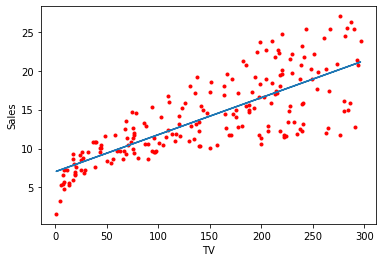

In [6]:
m = beta_1
b = beta_0
x = data.TV
plt.scatter(data.TV, data.sales, color='red', marker=".")
plt.ylabel("Sales")
plt.xlabel("TV")
plt.plot(data.TV, m*x + b)

The blue line you see in the plot is the simple linear regression.  We found the coefficients (slope and intersect) such that the resulting blue line is as close as possible to our $n=200$ data points.

This is what a simple linear regression model does. If you use any other library, like scikit-learn, this is what the library does under the hood. Let’s see that in action. Below lines of code does exactly the same thing differently.

Slope: 
 [0.04753664]
Intercept: 
 7.032593549127695


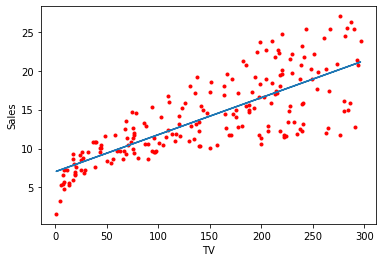

In [7]:
from sklearn import datasets, linear_model

X = data.TV.to_numpy().reshape(-1,1)
y = data.sales

regr = linear_model.LinearRegression()
regr.fit(X, y)

m = regr.coef_
b = regr.intercept_

print('Slope: \n', m)
print('Intercept: \n', b)

plt.scatter(X, y,  color='red', marker=".")
plt.ylabel("Sales")
plt.xlabel("TV")
plt.plot(X, (m*X + b))

As you can see, both plots are identical. The regression line our linear model estimated is the same as what sci-kit learn estimated, because the coefficients are the same. 
 
I hope you now have a good understanding of what goes under the hood with these libraries.
 
We can repeat the same thing with other two advertisement budgets data.

0.054693098472273355 12.35140706927816


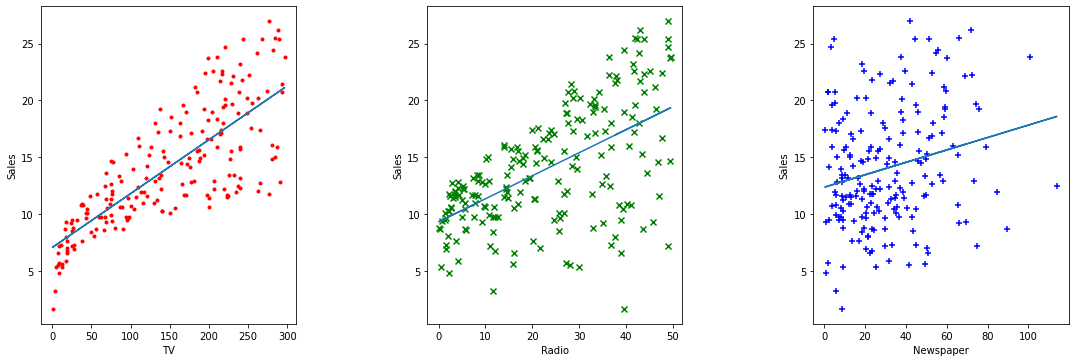

In [8]:
def regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    n = X.shape[0]

    beta_1 = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X-x_mean)** 2)
    beta_0 = y_mean - (beta_1*x_mean)
    return beta_1, beta_0

beta_1_tv, beta_0_tv = regression(data.TV, data.sales)
beta_1_radio, beta_0_radio = regression(data.radio, data.sales)
beta_1_newspapers, beta_0_newspapers = regression(data.newspaper, data.sales)
print(beta_1_newspapers, beta_0_newspapers)
fig, subplt = plt.subplots(1, 3, figsize=(15,5))

fig.tight_layout(w_pad=10, h_pad=10,)

subplt[0].scatter(data.TV, data.sales, color='red', marker=".")
subplt[0].set_xlabel("TV")
subplt[0].set_ylabel("Sales")
subplt[0].plot(data.TV, (data.TV*beta_1_tv+beta_0_tv))


subplt[1].scatter(data.radio, data.sales, color='green', marker="x")
subplt[1].set_xlabel("Radio")
subplt[1].set_ylabel("Sales")
subplt[1].plot(data.radio, (data.radio*beta_1_radio+beta_0_radio))

subplt[2].scatter(data.newspaper, data.sales, color='blue', marker="+")
subplt[2].set_xlabel("Newspaper")
subplt[2].set_ylabel("Sales")
subplt[2].plot(data.newspaper, (data.newspaper*beta_1_newspapers+beta_0_newspapers))

Using the coefficients estimated by our model for all three advertising media, now we can understand the effect of advertising budgets on the sales. 
 
For example, 
 
We have coefficients 0.202 for radio, accordingly, an additional \\$1000 spent on Radio advertising is associated with selling approximately 202 units of the xyz product.
 
We have coefficients 0.0546 for newspapers, accordingly, an additional \\$1000 spent on Newspaper advertising is associated with selling approximately 54 units of the xyz product.


### Observations
 
- Simple Linear Regression is by far the simplest yet powerful supervised machine learning algorithm. The easiest to adapt and tune.
- We estimated the coefficients using $n=200$ data points. If we have more data points then our estimates will be more accurate and eventually our model will be more accurate. This drums the point home that in machine learning, more data is always good for the accuracy of the model. This is true not only in case of Linear Regression but most Machine Learning algorithms.
- It is always interesting to know what goes under the hood of readymade libraries.

### Next Steps
 
In the next few articles, I am planning to expand on these concepts. I will be discussing 
- How to assess the accuracy of the model.
- How to tweak this model for Multiple Linear Regression.
- How to confirm if there is a relationship between the response and predictors.This will help in deciding the important variables you want to use in your mode.